In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import nltk
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
train = pd.DataFrame(pd.read_json('../input/cooking/train.json'))
test = pd.DataFrame(pd.read_json('../input/cooking/test.json'))

In [3]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
train['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

<AxesSubplot:>

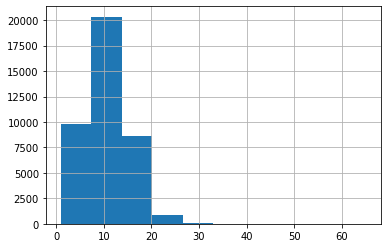

In [5]:
train['ingredients'].str.len().hist()

In [6]:
train.groupby('cuisine').describe()

id                                                        \
               count          mean           std    min       25%      50%   
cuisine                                                                      
brazilian      467.0  25472.366167  14283.106437  203.0  13174.00  25620.0   
british        804.0  25212.152985  14266.986737  168.0  12647.75  25205.5   
cajun_creole  1546.0  24765.837646  14019.280693   29.0  12664.25  24247.0   
chinese       2673.0  24755.108118  14392.581659    3.0  12199.00  24941.0   
filipino       755.0  24885.507285  14317.468463   87.0  12833.00  24976.0   
french        2646.0  24634.241497  14091.200530    2.0  12429.00  24363.5   
greek         1175.0  24658.258723  14525.186898   34.0  11965.50  24762.0   
indian        3003.0  25165.607393  14340.912253   16.0  12642.50  25307.0   
irish          667.0  24995.655172  14429.338971   44.0  12046.50  25495.0   
italian       7838.0  24736.780301  14339.738071    4.0  12348.50  24693.0   
jamaican       526.0  24477.600760  14397.487070   30.0  12245.25  23994.0   
japanese      1423.0  24867.964863  14392.669513   32.0  12979.00  24464.0   
korean         830.0  25060.720482  14330.996146   79.0  12546.25  25721.0   
mexican       6438.0  24886.905561  14484.494206    1.0  12380.00  24831.0   
moroccan       821.0  25485.309379  14299.924633   63.0  14032.00  26430.0   
russian        489.0  25599.642127  14625.513241   40.0  12586.00  26207.0   
southern_us   4320.0  24675.439583  14338.782190    9.0  12179.00  24640.0   
spanish        989.0  25252.100101  14652.037081    0.0  12662.00  26310.0   
thai          1539.0  24715.289799  14351.105877   21.0  12386.00  24705.0   
vietnamese     825.0  24642.495758  14610.336559  107.0  11023.00  25042.0   

                                 
                   75%      max  
cuisine                          
brazilian     37723.00  49683.0  
british       37975.00  49648.0  
cajun_creole  36679.50  49702.0  
chinese       37286.00  49673.0  
filipino      37534.50  49682.0  
french        36754.75  49696.0  
greek         37225.00  49710.0  
indian        37539.00  49716.0  
irish         37140.00  49714.0  
italian       37207.25  49708.0  
jamaican      36024.00  49638.0  
japanese      37496.00  49536.0  
korean        37321.75  49642.0  
mexican       37487.50  49717.0  
moroccan      37787.00  49667.0  
russian       37988.00  49703.0  
southern_us   37084.25  49713.0  
spanish       38209.00  49666.0  
thai          37196.50  49691.0  
vietnamese    37302.00  49652.0

<AxesSubplot:>

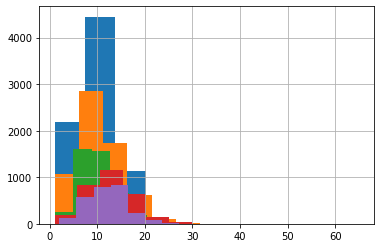

In [7]:
train.loc[train['cuisine'] == 'italian', 'ingredients'].str.len().hist()
train.loc[train['cuisine'] == 'mexican', 'ingredients'].str.len().hist()
train.loc[train['cuisine'] == 'southern_us', 'ingredients'].str.len().hist()
train.loc[train['cuisine'] == 'indian', 'ingredients'].str.len().hist()
train.loc[train['cuisine'] == 'chinese', 'ingredients'].str.len().hist()

<AxesSubplot:>

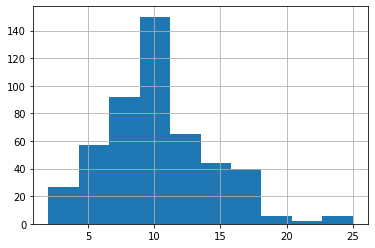

In [8]:
train.loc[train['cuisine'] == 'russian', 'ingredients'].str.len().hist()

In [9]:
train['ingredients'] = train['ingredients'].apply(','.join)
test['ingredients'] = test['ingredients'].apply(','.join)

In [10]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"romaine lettuce,black olives,grape tomatoes,ga..."
1,25693,southern_us,"plain flour,ground pepper,salt,tomatoes,ground..."
2,20130,filipino,"eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,22213,indian,"water,vegetable oil,wheat,salt"
4,13162,indian,"black pepper,shallots,cornflour,cayenne pepper..."


In [11]:
x_train, x_test, y_train, y_test = train_test_split(train['ingredients'], train['cuisine'], test_size = 0.30, random_state = 102)

In [12]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [13]:
from sklearn.preprocessing import MaxAbsScaler
tf_idf = TfidfVectorizer(tokenizer = LemmaTokenizer(), stop_words = 'english', lowercase = True, token_pattern = r"[A-Za-z]", max_df = 0.1, ngram_range = (1,2))
logit = LogisticRegression(max_iter = 10000)
tfidf_logit_pipeline = Pipeline([('tf_idf',tf_idf), ('scale', MaxAbsScaler()), ('logit', logit)])

In [14]:
tfidf_logit_pipeline.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_df=0.1, ngram_range=(1, 2),
                                 stop_words='english', token_pattern='[A-Za-z]',
                                 tokenizer=<__main__.LemmaTokenizer object at 0x7fca73f28b50>)),
                ('scale', MaxAbsScaler()),
                ('logit', LogisticRegression(max_iter=10000))])

In [15]:
y_pred = tfidf_logit_pipeline.predict(x_test)
accuracy_score(y_test, y_pred)

0.780273191988603

<AxesSubplot:>

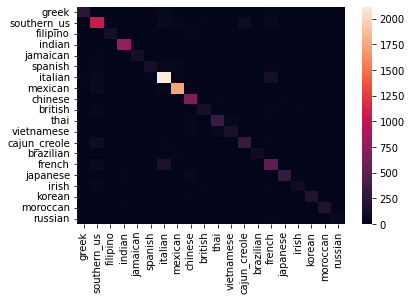

In [16]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame( confusion_matrix(y_test, y_pred, labels = train['cuisine'].unique())
                 , index = train['cuisine'].unique(), columns = train['cuisine'].unique() )
sns.heatmap(cm)

In [17]:
pred = tfidf_logit_pipeline.predict(test['ingredients'])
result = pd.DataFrame(data = pred, columns = ['cuisine'], index = test['id'])
result.reset_index(level = 0, inplace = True)

In [18]:
result.head()

,id,cuisine
0,18009,irish
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian


In [19]:
result.to_csv('Result.csv', index = False)